# C23-PR588 AUD/IDR DNN ENSEMBLE MODEL

Import necessary libraries

In [42]:
%run helper_functions_and_libraries.py
logging.set_verbosity(logging.ERROR)

Begin by looking at the structure of the csv that contains the data:

In [43]:
CURRENCIES_CSV = './currency_data_10_years_recent.csv'

# Create dataframe by using datas from csv file
currencies_df = pd.read_csv(CURRENCIES_CSV)

# Create new dataframe containing ONLY needed data for the model
aud_idr_df = currencies_df[['date', 'AUD']]

# Displaying the first and last 5 row of data to understand the contents of the data
display(aud_idr_df.head())
display(aud_idr_df.tail())

,date,AUD
0,6/12/2013,9356.797129
1,6/13/2013,9493.426679
2,6/14/2013,9466.428173
3,6/15/2013,9466.158418
4,6/16/2013,9405.102519


,date,AUD
3648,6/8/2023,9962.285652
3649,6/9/2023,10036.638900
3650,6/10/2023,10035.144670
3651,6/11/2023,10009.071480
3652,6/12/2023,10046.141420


Each data point is composed of the date and the recorded exchange rate from AUD to IDR

## Parsing the raw data
Read the data from the csv file and Creating global (G) dataclass

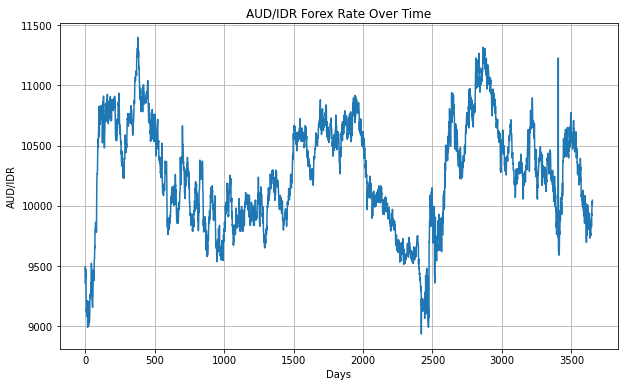

In [44]:
# Test your function and save all "global" variables within the G class (G stands for global)
@dataclass
class G:
    
    DATAFRAME = aud_idr_df
    times, values = parse_data_from_df(DATAFRAME, 'AUD')
    TIME = times
    SERIES = values
    SPLIT_TIME = int(math.floor(len(values)*0.8))
    WINDOW_SIZE = 30
    BATCH_SIZE = 32
    SHUFFLE_BUFFER_SIZE = 1000

plt.figure(figsize=(10, 6))
plot_series(G.TIME, G.SERIES, title="AUD/IDR Forex Rate Over Time", xlabel="Days", ylabel="AUD/IDR")

## Processing the data

train_val_split and windowed_dataset functions taken from 'tensorflow-sequences-time-series-and-prediction' courses in Coursera

In [45]:
# Split the dataset
time_train, series_train, time_valid, series_valid = train_val_split(G.TIME, G.SERIES, G.SPLIT_TIME, None)

In [46]:
# Apply the transformation to the training set
train_set = windowed_dataset(series_train, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)
valid_set = windowed_dataset(series_valid, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


## Defining the model architecture

Using 5 layers model

In [47]:
def create_model_5_layers():
    
    # Build the model
    model = tf.keras.models.Sequential([
        
        tf.keras.layers.Dense(256, input_shape=[G.WINDOW_SIZE], activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1)

    ], name="model_5_layers")

    return model

In [48]:
# Create and test model
model_1 = create_model_5_layers()

# Get initial weights
init_weights = model_1.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_1.set_weights(init_weights)

# Print the model summary
model_1.summary()

Model: "model_5_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

In [49]:
def compile_model(dataset, model_to_train):

    model = model_to_train
    
    # Select optimizer
    optimizer = tf.keras.optimizers.Adam()
    
    # Compile the model passing in the appropriate loss
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=['mae'])
    
    # Train the model
    history = model.fit(dataset,
                        epochs=100, 
                        verbose=1,
                        batch_size=G.BATCH_SIZE,
                        validation_data=valid_set,
                        callbacks=[create_model_checkpoint(save_path='experiments')])

    return history

# Run the training with dynamic LR
history_1 = compile_model(train_set, model_1)

Epoch 1/100
     89/Unknown - 1s 4ms/step - loss: 504.7451 - mae: 505.2447INFO:tensorflow:Assets written to: experiments/7\assets


INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 2s 15ms/step - loss: 500.6628 - mae: 501.1624 - val_loss: 234.3572 - val_mae: 234.8571
Epoch 2/100
86/91 [===========================>..] - ETA: 0s - loss: 158.7635 - mae: 159.2620INFO:tensorflow:Assets written to: experiments/7\assets


INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 1s 13ms/step - loss: 157.9986 - mae: 158.4973 - val_loss: 155.5933 - val_mae: 156.0926
Epoch 3/100
80/91 [=========================>....] - ETA: 0s - loss: 199.0494 - mae: 199.5491INFO:tensorflow:Assets written to: experiments/7\assets


INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 1s 13ms/step - loss: 200.1671 - mae: 200.6669 - val_loss: 109.7509 - val_mae: 110.2501
Epoch 4/100
91/91 [==============================] - 1s 5ms/step - loss: 167.1803 - mae: 167.6794 - val_loss: 120.0850 - val_mae: 120.5843
Epoch 5/100
84/91 [==========================>...] - ETA: 0s - loss: 133.4863 - mae: 133.9857INFO:tensorflow:Assets written to: experiments/7\assets


INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 1s 15ms/step - loss: 131.7275 - mae: 132.2268 - val_loss: 108.2947 - val_mae: 108.7946
Epoch 6/100
91/91 [==============================] - 1s 5ms/step - loss: 162.4157 - mae: 162.9149 - val_loss: 286.3521 - val_mae: 286.8521
Epoch 7/100
91/91 [==============================] - 1s 5ms/step - loss: 144.0571 - mae: 144.5563 - val_loss: 263.8495 - val_mae: 264.3495
Epoch 8/100
81/91 [=========================>....] - ETA: 0s - loss: 141.0349 - mae: 141.5343INFO:tensorflow:Assets written to: experiments/7\assets


INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 1s 14ms/step - loss: 136.5371 - mae: 137.0366 - val_loss: 101.9585 - val_mae: 102.4582
Epoch 9/100
91/91 [==============================] - 1s 5ms/step - loss: 123.8362 - mae: 124.3354 - val_loss: 196.5123 - val_mae: 197.0123
Epoch 10/100
81/91 [=========================>....] - ETA: 0s - loss: 133.4607 - mae: 133.9600INFO:tensorflow:Assets written to: experiments/7\assets


INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 1s 14ms/step - loss: 134.2130 - mae: 134.7124 - val_loss: 95.3905 - val_mae: 95.8901
Epoch 11/100
91/91 [==============================] - 1s 5ms/step - loss: 115.6044 - mae: 116.1034 - val_loss: 152.9045 - val_mae: 153.4043
Epoch 12/100
91/91 [==============================] - 1s 5ms/step - loss: 171.5031 - mae: 172.0027 - val_loss: 315.5563 - val_mae: 316.0563
Epoch 13/100
91/91 [==============================] - 1s 5ms/step - loss: 121.3092 - mae: 121.8088 - val_loss: 95.8316 - val_mae: 96.3305
Epoch 14/100
86/91 [===========================>..] - ETA: 0s - loss: 121.5765 - mae: 122.0752INFO:tensorflow:Assets written to: experiments/7\assets


INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 1s 13ms/step - loss: 124.6897 - mae: 125.1885 - val_loss: 90.4685 - val_mae: 90.9668
Epoch 15/100
91/91 [==============================] - 1s 5ms/step - loss: 112.7983 - mae: 113.2977 - val_loss: 99.7757 - val_mae: 100.2734
Epoch 16/100
91/91 [==============================] - 1s 5ms/step - loss: 118.3029 - mae: 118.8020 - val_loss: 125.3255 - val_mae: 125.8253
Epoch 17/100
91/91 [==============================] - 1s 5ms/step - loss: 122.1104 - mae: 122.6094 - val_loss: 172.7559 - val_mae: 173.2558
Epoch 18/100
91/91 [==============================] - 1s 5ms/step - loss: 124.7489 - mae: 125.2486 - val_loss: 94.4395 - val_mae: 94.9379
Epoch 19/100
91/91 [==============================] - 1s 5ms/step - loss: 120.8640 - mae: 121.3634 - val_loss: 131.0892 - val_mae: 131.5887
Epoch 20/100
91/91 [==============================] - 1s 5ms/step - loss: 123.8650 - mae: 124.3642 - val_loss: 110.9035 - val_mae: 111.4019
Epoch 21/100
91/91 [=================

INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 1s 13ms/step - loss: 101.7238 - mae: 102.2227 - val_loss: 85.3179 - val_mae: 85.8165
Epoch 23/100
72/91 [======================>.......] - ETA: 0s - loss: 107.6485 - mae: 108.1478INFO:tensorflow:Assets written to: experiments/7\assets


INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 1s 13ms/step - loss: 118.4503 - mae: 118.9496 - val_loss: 84.6590 - val_mae: 85.1585
Epoch 24/100
91/91 [==============================] - 1s 5ms/step - loss: 115.6794 - mae: 116.1783 - val_loss: 107.9852 - val_mae: 108.4842
Epoch 25/100
81/91 [=========================>....] - ETA: 0s - loss: 102.7670 - mae: 103.2660INFO:tensorflow:Assets written to: experiments/7\assets


INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 1s 14ms/step - loss: 102.5173 - mae: 103.0163 - val_loss: 82.9478 - val_mae: 83.4474
Epoch 26/100
91/91 [==============================] - 1s 5ms/step - loss: 117.2447 - mae: 117.7433 - val_loss: 87.7104 - val_mae: 88.2096
Epoch 27/100
91/91 [==============================] - 1s 5ms/step - loss: 115.8896 - mae: 116.3883 - val_loss: 175.6547 - val_mae: 176.1543
Epoch 28/100
91/91 [==============================] - 1s 5ms/step - loss: 145.1219 - mae: 145.6217 - val_loss: 84.9646 - val_mae: 85.4643
Epoch 29/100
91/91 [==============================] - 1s 5ms/step - loss: 109.9034 - mae: 110.4017 - val_loss: 309.7191 - val_mae: 310.2191
Epoch 30/100
91/91 [==============================] - 1s 5ms/step - loss: 123.8117 - mae: 124.3105 - val_loss: 119.1973 - val_mae: 119.6955
Epoch 31/100
91/91 [==============================] - 1s 5ms/step - loss: 91.7426 - mae: 92.2413 - val_loss: 84.1370 - val_mae: 84.6355
Epoch 32/100
91/91 [======================

INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 2s 16ms/step - loss: 112.8337 - mae: 113.3330 - val_loss: 79.6990 - val_mae: 80.1990
Epoch 34/100
91/91 [==============================] - 1s 5ms/step - loss: 105.7521 - mae: 106.2509 - val_loss: 79.9070 - val_mae: 80.4055
Epoch 35/100
91/91 [==============================] - 1s 5ms/step - loss: 135.0704 - mae: 135.5694 - val_loss: 215.6534 - val_mae: 216.1531
Epoch 36/100
91/91 [==============================] - 1s 5ms/step - loss: 118.1422 - mae: 118.6413 - val_loss: 150.8371 - val_mae: 151.3361
Epoch 37/100
91/91 [==============================] - 1s 5ms/step - loss: 100.8952 - mae: 101.3950 - val_loss: 81.7489 - val_mae: 82.2488
Epoch 38/100
89/91 [============================>.] - ETA: 0s - loss: 97.4965 - mae: 97.9957  INFO:tensorflow:Assets written to: experiments/7\assets


INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 2s 17ms/step - loss: 97.3293 - mae: 97.8285 - val_loss: 77.5575 - val_mae: 78.0574
Epoch 39/100
76/91 [========================>.....] - ETA: 0s - loss: 105.8830 - mae: 106.3824INFO:tensorflow:Assets written to: experiments/7\assets


INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 1s 14ms/step - loss: 103.1090 - mae: 103.6084 - val_loss: 77.5217 - val_mae: 78.0203
Epoch 40/100
91/91 [==============================] - 1s 5ms/step - loss: 101.3886 - mae: 101.8877 - val_loss: 95.3303 - val_mae: 95.8286
Epoch 41/100
91/91 [==============================] - 1s 5ms/step - loss: 98.3024 - mae: 98.8017 - val_loss: 201.9803 - val_mae: 202.4802
Epoch 42/100
91/91 [==============================] - 1s 5ms/step - loss: 106.4583 - mae: 106.9570 - val_loss: 96.6346 - val_mae: 97.1339
Epoch 43/100
91/91 [==============================] - 1s 5ms/step - loss: 97.2583 - mae: 97.7569 - val_loss: 87.7288 - val_mae: 88.2272
Epoch 44/100
91/91 [==============================] - 1s 5ms/step - loss: 84.0398 - mae: 84.5390 - val_loss: 140.8581 - val_mae: 141.3577
Epoch 45/100
91/91 [==============================] - 1s 5ms/step - loss: 103.3538 - mae: 103.8524 - val_loss: 160.7725 - val_mae: 161.2715
Epoch 46/100
91/91 [==========================

INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 2s 16ms/step - loss: 99.1245 - mae: 99.6231 - val_loss: 74.9553 - val_mae: 75.4535
Epoch 51/100
70/91 [======================>.......] - ETA: 0s - loss: 92.1667 - mae: 92.6655INFO:tensorflow:Assets written to: experiments/7\assets


INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 1s 14ms/step - loss: 94.6959 - mae: 95.1948 - val_loss: 73.6615 - val_mae: 74.1604
Epoch 52/100
91/91 [==============================] - 1s 5ms/step - loss: 98.9261 - mae: 99.4242 - val_loss: 78.2270 - val_mae: 78.7259
Epoch 53/100
91/91 [==============================] - 1s 5ms/step - loss: 101.0902 - mae: 101.5894 - val_loss: 81.8773 - val_mae: 82.3767
Epoch 54/100
91/91 [==============================] - 1s 5ms/step - loss: 89.0069 - mae: 89.5050 - val_loss: 132.0065 - val_mae: 132.5059
Epoch 55/100
91/91 [==============================] - 1s 5ms/step - loss: 79.9399 - mae: 80.4385 - val_loss: 76.7311 - val_mae: 77.2296
Epoch 56/100
91/91 [==============================] - 1s 5ms/step - loss: 86.1650 - mae: 86.6637 - val_loss: 104.3940 - val_mae: 104.8926
Epoch 57/100
91/91 [==============================] - 1s 5ms/step - loss: 88.5114 - mae: 89.0100 - val_loss: 74.3203 - val_mae: 74.8187
Epoch 58/100
91/91 [==============================] - 

INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 1s 14ms/step - loss: 79.0085 - mae: 79.5066 - val_loss: 70.4140 - val_mae: 70.9126
Epoch 69/100
91/91 [==============================] - 1s 5ms/step - loss: 90.8444 - mae: 91.3423 - val_loss: 82.0106 - val_mae: 82.5085
Epoch 70/100
91/91 [==============================] - 1s 5ms/step - loss: 90.4957 - mae: 90.9946 - val_loss: 147.0613 - val_mae: 147.5608
Epoch 71/100
91/91 [==============================] - 1s 5ms/step - loss: 80.3909 - mae: 80.8898 - val_loss: 105.8861 - val_mae: 106.3852
Epoch 72/100
91/91 [==============================] - 1s 5ms/step - loss: 96.5283 - mae: 97.0275 - val_loss: 71.0538 - val_mae: 71.5511
Epoch 73/100
91/91 [==============================] - 1s 5ms/step - loss: 94.4178 - mae: 94.9167 - val_loss: 89.2499 - val_mae: 89.7493
Epoch 74/100
91/91 [==============================] - 1s 5ms/step - loss: 85.4843 - mae: 85.9834 - val_loss: 77.1831 - val_mae: 77.6817
Epoch 75/100
91/91 [==============================] - 1s

INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 2s 16ms/step - loss: 84.5518 - mae: 85.0502 - val_loss: 67.5778 - val_mae: 68.0757
Epoch 81/100
91/91 [==============================] - 1s 4ms/step - loss: 73.9814 - mae: 74.4801 - val_loss: 72.1977 - val_mae: 72.6967
Epoch 82/100
91/91 [==============================] - 1s 5ms/step - loss: 95.1383 - mae: 95.6367 - val_loss: 103.1556 - val_mae: 103.6554
Epoch 83/100
91/91 [==============================] - 1s 5ms/step - loss: 109.0983 - mae: 109.5975 - val_loss: 130.2615 - val_mae: 130.7615
Epoch 84/100
91/91 [==============================] - 1s 5ms/step - loss: 98.4479 - mae: 98.9468 - val_loss: 71.0360 - val_mae: 71.5348
Epoch 85/100
91/91 [==============================] - 1s 5ms/step - loss: 80.3240 - mae: 80.8223 - val_loss: 68.4651 - val_mae: 68.9625
Epoch 86/100
91/91 [==============================] - 1s 5ms/step - loss: 74.4831 - mae: 74.9824 - val_loss: 84.3852 - val_mae: 84.8843
Epoch 87/100
91/91 [==============================] - 

INFO:tensorflow:Assets written to: experiments/7\assets


91/91 [==============================] - 1s 13ms/step - loss: 95.2862 - mae: 95.7851 - val_loss: 67.4432 - val_mae: 67.9410
Epoch 95/100
91/91 [==============================] - 1s 5ms/step - loss: 86.3297 - mae: 86.8285 - val_loss: 71.4143 - val_mae: 71.9132
Epoch 96/100
91/91 [==============================] - 1s 5ms/step - loss: 82.8873 - mae: 83.3853 - val_loss: 113.4605 - val_mae: 113.9602
Epoch 97/100
91/91 [==============================] - 1s 5ms/step - loss: 79.6722 - mae: 80.1710 - val_loss: 76.3071 - val_mae: 76.8067
Epoch 98/100
91/91 [==============================] - 1s 5ms/step - loss: 73.8878 - mae: 74.3862 - val_loss: 91.6036 - val_mae: 92.1033
Epoch 99/100
91/91 [==============================] - 1s 5ms/step - loss: 80.5095 - mae: 81.0081 - val_loss: 100.4011 - val_mae: 100.9006
Epoch 100/100
91/91 [==============================] - 1s 4ms/step - loss: 80.2471 - mae: 80.7461 - val_loss: 85.6075 - val_mae: 86.1072


## Visualize MAE and loss

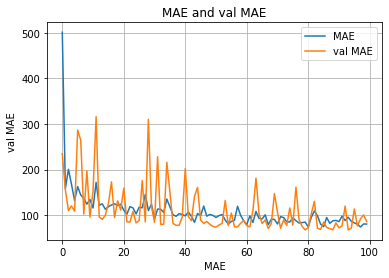

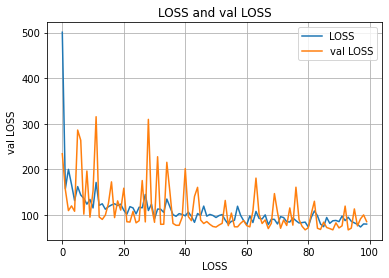

In [50]:
visualize_mae_loss(history_1)

## Evaluating the forecast

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/23 [==============================] - 0s 4ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
114/114 [==============================] - 0s 4ms/step


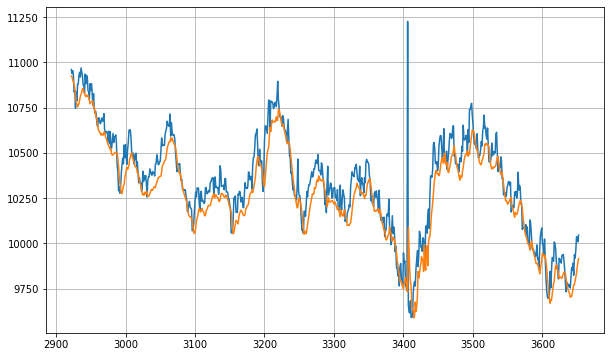

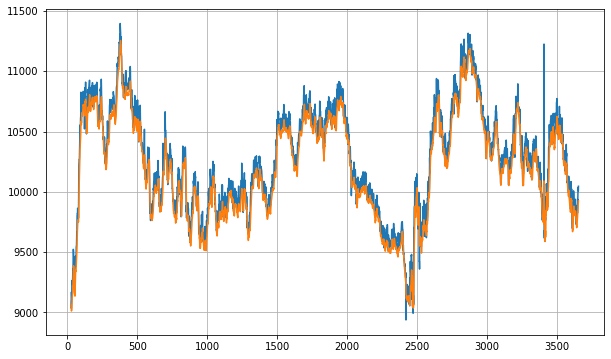

In [51]:
dnn_forecast_model_1 = evaluate_forecast(model_1, G.TIME, G.SERIES, time_valid, series_valid,
                                       G.SPLIT_TIME, -1, G.WINDOW_SIZE, G.BATCH_SIZE)

In [52]:
metrics_model_1 = compute_metrics(series_valid, dnn_forecast_model_1)
metrics_model_1

{'mae': 313.28357, 'mse': 154646.25, 'rmse': 375.32944, 'mape': 3.0283446}

In [53]:
print(f'2 last Actual Price = {series_valid[-2:]}, Predicted Price = {dnn_forecast_model_1[-2:]}')

2 last Actual Price = [[10009.07148]
 [10046.14142]], Predicted Price = [9895.81  9915.309]


## Defining the model architecture

Using 4 layers model with regularizers

In [54]:
def create_model_regularized_4_layers():
    
    # Build the model
    model = tf.keras.models.Sequential([
        
        tf.keras.layers.Dense(128, input_shape=[G.WINDOW_SIZE], activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)

    ], name="model_regularized_4_layers")

    return model

In [55]:
# Create and test model
model_2 = create_model_regularized_4_layers()

# Get initial weights
init_weights = model_2.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_2.set_weights(init_weights)

# Print the model summary
model_2.summary()

Model: "model_regularized_4_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

In [56]:
# Run the training with dynamic LR
history_2 = compile_model(train_set, model_2)

Epoch 1/100
     76/Unknown - 1s 3ms/step - loss: 689.1849 - mae: 688.4338INFO:tensorflow:Assets written to: experiments/8\assets


INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 2s 15ms/step - loss: 599.7335 - mae: 599.0455 - val_loss: 117.3424 - val_mae: 117.0287
Epoch 2/100
88/91 [============================>.] - ETA: 0s - loss: 127.6686 - mae: 127.4812INFO:tensorflow:Assets written to: experiments/8\assets


INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 2s 16ms/step - loss: 128.0300 - mae: 127.8446 - val_loss: 110.4006 - val_mae: 110.2910
Epoch 3/100
91/91 [==============================] - 1s 5ms/step - loss: 129.7800 - mae: 129.6937 - val_loss: 111.8050 - val_mae: 111.7325
Epoch 4/100
87/91 [===========================>..] - ETA: 0s - loss: 119.8138 - mae: 119.7454INFO:tensorflow:Assets written to: experiments/8\assets


INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 13ms/step - loss: 119.3900 - mae: 119.3217 - val_loss: 101.0480 - val_mae: 100.9827
Epoch 5/100
82/91 [==========================>...] - ETA: 0s - loss: 124.2324 - mae: 124.1677INFO:tensorflow:Assets written to: experiments/8\assets


INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 13ms/step - loss: 124.1637 - mae: 124.0991 - val_loss: 93.4966 - val_mae: 93.4326
Epoch 6/100
91/91 [==============================] - 1s 4ms/step - loss: 165.4619 - mae: 165.3987 - val_loss: 100.3180 - val_mae: 100.2551
Epoch 7/100
91/91 [==============================] - 1s 4ms/step - loss: 120.8608 - mae: 120.7980 - val_loss: 137.6105 - val_mae: 137.5476
Epoch 8/100
91/91 [==============================] - ETA: 0s - loss: 121.1377 - mae: 121.0758INFO:tensorflow:Assets written to: experiments/8\assets


INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 13ms/step - loss: 121.1377 - mae: 121.0758 - val_loss: 92.1721 - val_mae: 92.1112
Epoch 9/100
91/91 [==============================] - 1s 4ms/step - loss: 111.1792 - mae: 111.1178 - val_loss: 155.4553 - val_mae: 155.3941
Epoch 10/100
91/91 [==============================] - 1s 4ms/step - loss: 121.0308 - mae: 120.9697 - val_loss: 330.6982 - val_mae: 330.6380
Epoch 11/100
91/91 [==============================] - 1s 4ms/step - loss: 115.8749 - mae: 115.8142 - val_loss: 94.3564 - val_mae: 94.2952
Epoch 12/100
91/91 [==============================] - 1s 4ms/step - loss: 101.1067 - mae: 101.0462 - val_loss: 130.5078 - val_mae: 130.4480
Epoch 13/100
91/91 [==============================] - 1s 4ms/step - loss: 155.1957 - mae: 155.1339 - val_loss: 95.3780 - val_mae: 95.3155
Epoch 14/100
91/91 [==============================] - 1s 4ms/step - loss: 117.2083 - mae: 117.1450 - val_loss: 94.1040 - val_mae: 94.0389
Epoch 15/100
91/91 [=====================

INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 14ms/step - loss: 100.3258 - mae: 100.2607 - val_loss: 84.1600 - val_mae: 84.0941
Epoch 17/100
91/91 [==============================] - 1s 5ms/step - loss: 99.9446 - mae: 99.8792 - val_loss: 134.2420 - val_mae: 134.1774
Epoch 18/100
91/91 [==============================] - 1s 4ms/step - loss: 108.1877 - mae: 108.1232 - val_loss: 86.2620 - val_mae: 86.1985
Epoch 19/100
91/91 [==============================] - 1s 4ms/step - loss: 90.6948 - mae: 90.6311 - val_loss: 87.2281 - val_mae: 87.1650
Epoch 20/100
91/91 [==============================] - 1s 4ms/step - loss: 124.2216 - mae: 124.1591 - val_loss: 87.1137 - val_mae: 87.0515
Epoch 21/100
91/91 [==============================] - 1s 4ms/step - loss: 94.3610 - mae: 94.2981 - val_loss: 126.6854 - val_mae: 126.6231
Epoch 22/100
91/91 [==============================] - 1s 4ms/step - loss: 132.2202 - mae: 132.1592 - val_loss: 107.0526 - val_mae: 106.9916
Epoch 23/100
91/91 [==========================

INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 13ms/step - loss: 101.9123 - mae: 101.8534 - val_loss: 73.0811 - val_mae: 73.0207
Epoch 26/100
86/91 [===========================>..] - ETA: 0s - loss: 85.2292 - mae: 85.1707INFO:tensorflow:Assets written to: experiments/8\assets


INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 13ms/step - loss: 84.9548 - mae: 84.8963 - val_loss: 71.6236 - val_mae: 71.5653
Epoch 27/100
91/91 [==============================] - 1s 4ms/step - loss: 88.9455 - mae: 88.8885 - val_loss: 152.5498 - val_mae: 152.4934
Epoch 28/100
91/91 [==============================] - 1s 4ms/step - loss: 95.6105 - mae: 95.5537 - val_loss: 127.6770 - val_mae: 127.6216
Epoch 29/100
91/91 [==============================] - 1s 4ms/step - loss: 100.5794 - mae: 100.5240 - val_loss: 119.9841 - val_mae: 119.9290
Epoch 30/100
91/91 [==============================] - 1s 4ms/step - loss: 91.6960 - mae: 91.6412 - val_loss: 89.3396 - val_mae: 89.2861
Epoch 31/100
91/91 [==============================] - 1s 4ms/step - loss: 98.5574 - mae: 98.5038 - val_loss: 73.4678 - val_mae: 73.4141
Epoch 32/100
91/91 [==============================] - 1s 5ms/step - loss: 87.1429 - mae: 87.0891 - val_loss: 151.9073 - val_mae: 151.8556
Epoch 33/100
91/91 [==============================

INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 12ms/step - loss: 83.1080 - mae: 83.0618 - val_loss: 69.6759 - val_mae: 69.6298
Epoch 41/100
91/91 [==============================] - 1s 4ms/step - loss: 112.3661 - mae: 112.3210 - val_loss: 101.0731 - val_mae: 101.0293
Epoch 42/100
80/91 [=========================>....] - ETA: 0s - loss: 70.1909 - mae: 70.1460INFO:tensorflow:Assets written to: experiments/8\assets


INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 13ms/step - loss: 69.9520 - mae: 69.9073 - val_loss: 66.7778 - val_mae: 66.7317
Epoch 43/100
91/91 [==============================] - 1s 4ms/step - loss: 84.5240 - mae: 84.4808 - val_loss: 137.7937 - val_mae: 137.7510
Epoch 44/100
91/91 [==============================] - 1s 4ms/step - loss: 81.4609 - mae: 81.4187 - val_loss: 71.5397 - val_mae: 71.4953
Epoch 45/100
91/91 [==============================] - 1s 5ms/step - loss: 112.6519 - mae: 112.6111 - val_loss: 113.0760 - val_mae: 113.0365
Epoch 46/100
91/91 [==============================] - 1s 4ms/step - loss: 82.9765 - mae: 82.9369 - val_loss: 121.1907 - val_mae: 121.1518
Epoch 47/100
91/91 [==============================] - 1s 4ms/step - loss: 78.8438 - mae: 78.8044 - val_loss: 101.5655 - val_mae: 101.5268
Epoch 48/100
91/91 [==============================] - 1s 4ms/step - loss: 84.5410 - mae: 84.5028 - val_loss: 73.1748 - val_mae: 73.1367
Epoch 49/100
59/91 [==================>...........

INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 2s 16ms/step - loss: 84.1020 - mae: 84.0641 - val_loss: 65.4075 - val_mae: 65.3717
Epoch 50/100
91/91 [==============================] - 1s 4ms/step - loss: 74.8759 - mae: 74.8397 - val_loss: 74.6192 - val_mae: 74.5837
Epoch 51/100
91/91 [==============================] - 1s 4ms/step - loss: 95.8209 - mae: 95.7855 - val_loss: 123.3412 - val_mae: 123.3075
Epoch 52/100
91/91 [==============================] - 1s 4ms/step - loss: 79.5001 - mae: 79.4660 - val_loss: 65.9186 - val_mae: 65.8859
Epoch 53/100
91/91 [==============================] - 1s 4ms/step - loss: 82.1443 - mae: 82.1111 - val_loss: 132.5012 - val_mae: 132.4696
Epoch 54/100
85/91 [===========================>..] - ETA: 0s - loss: 89.8469 - mae: 89.8156INFO:tensorflow:Assets written to: experiments/8\assets


INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 13ms/step - loss: 89.9618 - mae: 89.9303 - val_loss: 65.0714 - val_mae: 65.0400
Epoch 55/100
91/91 [==============================] - 1s 4ms/step - loss: 79.8097 - mae: 79.7792 - val_loss: 78.3796 - val_mae: 78.3491
Epoch 56/100
91/91 [==============================] - 1s 5ms/step - loss: 88.8834 - mae: 88.8548 - val_loss: 98.2402 - val_mae: 98.2114
Epoch 57/100
91/91 [==============================] - 1s 5ms/step - loss: 87.9345 - mae: 87.9069 - val_loss: 86.3017 - val_mae: 86.2758
Epoch 58/100
91/91 [==============================] - 1s 5ms/step - loss: 92.3425 - mae: 92.3155 - val_loss: 68.9781 - val_mae: 68.9533
Epoch 59/100
91/91 [==============================] - 1s 4ms/step - loss: 83.3429 - mae: 83.3176 - val_loss: 79.3000 - val_mae: 79.2745
Epoch 60/100
91/91 [==============================] - 1s 4ms/step - loss: 96.9955 - mae: 96.9716 - val_loss: 135.8714 - val_mae: 135.8494
Epoch 61/100
85/91 [===========================>..] - ETA:

INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 13ms/step - loss: 75.6833 - mae: 75.6597 - val_loss: 65.0593 - val_mae: 65.0374
Epoch 62/100
88/91 [============================>.] - ETA: 0s - loss: 77.2129 - mae: 77.1912INFO:tensorflow:Assets written to: experiments/8\assets


INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 13ms/step - loss: 77.1839 - mae: 77.1623 - val_loss: 64.0704 - val_mae: 64.0494
Epoch 63/100
91/91 [==============================] - 1s 5ms/step - loss: 102.1815 - mae: 102.1617 - val_loss: 67.4873 - val_mae: 67.4683
Epoch 64/100
91/91 [==============================] - 1s 5ms/step - loss: 75.7614 - mae: 75.7421 - val_loss: 74.8661 - val_mae: 74.8475
Epoch 65/100
91/91 [==============================] - 1s 4ms/step - loss: 74.4171 - mae: 74.4001 - val_loss: 107.9234 - val_mae: 107.9070
Epoch 66/100
91/91 [==============================] - 1s 4ms/step - loss: 107.7550 - mae: 107.7396 - val_loss: 73.2989 - val_mae: 73.2852
Epoch 67/100
91/91 [==============================] - 1s 5ms/step - loss: 83.9727 - mae: 83.9589 - val_loss: 86.4416 - val_mae: 86.4282
Epoch 68/100
84/91 [==========================>...] - ETA: 0s - loss: 75.0930 - mae: 75.0796INFO:tensorflow:Assets written to: experiments/8\assets


INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 13ms/step - loss: 75.1905 - mae: 75.1773 - val_loss: 64.0475 - val_mae: 64.0350
Epoch 69/100
91/91 [==============================] - 1s 5ms/step - loss: 81.9820 - mae: 81.9705 - val_loss: 82.5800 - val_mae: 82.5701
Epoch 70/100
91/91 [==============================] - 1s 5ms/step - loss: 78.7182 - mae: 78.7078 - val_loss: 85.7970 - val_mae: 85.7876
Epoch 71/100
91/91 [==============================] - 1s 5ms/step - loss: 79.8945 - mae: 79.8860 - val_loss: 91.4477 - val_mae: 91.4405
Epoch 72/100
91/91 [==============================] - 1s 5ms/step - loss: 84.5221 - mae: 84.5147 - val_loss: 86.5092 - val_mae: 86.5025
Epoch 73/100
91/91 [==============================] - 1s 5ms/step - loss: 76.1153 - mae: 76.1093 - val_loss: 77.5347 - val_mae: 77.5275
Epoch 74/100
91/91 [==============================] - 1s 5ms/step - loss: 74.7467 - mae: 74.7421 - val_loss: 67.2348 - val_mae: 67.2291
Epoch 75/100
91/91 [==============================] - 1s 5ms

INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 13ms/step - loss: 75.0147 - mae: 75.0299 - val_loss: 63.7538 - val_mae: 63.7696
Epoch 86/100
91/91 [==============================] - 1s 4ms/step - loss: 82.5299 - mae: 82.5468 - val_loss: 70.2421 - val_mae: 70.2602
Epoch 87/100
86/91 [===========================>..] - ETA: 0s - loss: 89.0482 - mae: 89.0679 INFO:tensorflow:Assets written to: experiments/8\assets


INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 14ms/step - loss: 87.9511 - mae: 87.9708 - val_loss: 63.7068 - val_mae: 63.7264
Epoch 88/100
91/91 [==============================] - 1s 4ms/step - loss: 78.6715 - mae: 78.6920 - val_loss: 72.4794 - val_mae: 72.5001
Epoch 89/100
91/91 [==============================] - 1s 4ms/step - loss: 77.9795 - mae: 78.0028 - val_loss: 68.3781 - val_mae: 68.4026
Epoch 90/100
91/91 [==============================] - 1s 4ms/step - loss: 107.0002 - mae: 107.0261 - val_loss: 91.2262 - val_mae: 91.2519
Epoch 91/100
91/91 [==============================] - 1s 4ms/step - loss: 70.7024 - mae: 70.7289 - val_loss: 107.8884 - val_mae: 107.9177
Epoch 92/100
89/91 [============================>.] - ETA: 0s - loss: 80.4739 - mae: 80.5035INFO:tensorflow:Assets written to: experiments/8\assets


INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 12ms/step - loss: 81.6767 - mae: 81.7063 - val_loss: 63.2544 - val_mae: 63.2842
Epoch 93/100
91/91 [==============================] - 1s 4ms/step - loss: 81.8141 - mae: 81.8453 - val_loss: 64.1824 - val_mae: 64.2144
Epoch 94/100
91/91 [==============================] - 1s 4ms/step - loss: 96.6636 - mae: 96.6976 - val_loss: 66.7247 - val_mae: 66.7582
Epoch 95/100
82/91 [==========================>...] - ETA: 0s - loss: 73.2547 - mae: 73.2894INFO:tensorflow:Assets written to: experiments/8\assets


INFO:tensorflow:Assets written to: experiments/8\assets


91/91 [==============================] - 1s 13ms/step - loss: 72.5193 - mae: 72.5541 - val_loss: 62.9986 - val_mae: 63.0347
Epoch 96/100
91/91 [==============================] - 1s 4ms/step - loss: 94.0691 - mae: 94.1073 - val_loss: 117.6505 - val_mae: 117.6887
Epoch 97/100
91/91 [==============================] - 1s 4ms/step - loss: 70.4704 - mae: 70.5103 - val_loss: 82.8096 - val_mae: 82.8511
Epoch 98/100
91/91 [==============================] - 1s 4ms/step - loss: 83.9037 - mae: 83.9452 - val_loss: 74.6965 - val_mae: 74.7400
Epoch 99/100
91/91 [==============================] - 1s 4ms/step - loss: 77.9905 - mae: 78.0341 - val_loss: 99.8350 - val_mae: 99.8809
Epoch 100/100
91/91 [==============================] - 1s 4ms/step - loss: 80.6440 - mae: 80.6904 - val_loss: 68.9386 - val_mae: 68.9865


## Visualize MAE and loss

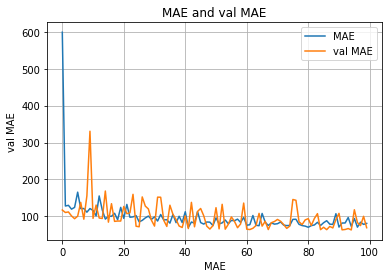

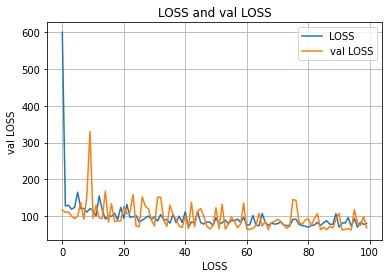

In [57]:
visualize_mae_loss(history_2)

## Evaluating the forecast

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/23 [==============================] - 0s 4ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
114/114 [==============================] - 0s 4ms/step


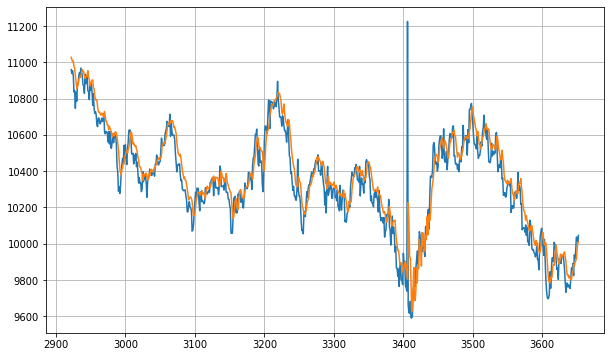

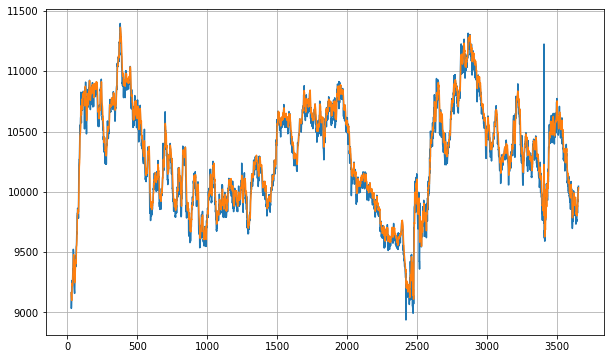

In [58]:
dnn_forecast_model_2 = evaluate_forecast(model_2, G.TIME, G.SERIES, time_valid, series_valid,
                                       G.SPLIT_TIME, -1, G.WINDOW_SIZE, G.BATCH_SIZE)

In [59]:
metrics_model_2 = compute_metrics(series_valid, dnn_forecast_model_2)
metrics_model_2

{'mae': 309.8849, 'mse': 152048.66, 'rmse': 371.04138, 'mape': 3.0106857}

In [60]:
print(f'2 last Actual Price = {series_valid[-2:]}, Predicted Price = {dnn_forecast_model_2[-2:]}')

2 last Actual Price = [[10009.07148]
 [10046.14142]], Predicted Price = [10001.584 10011.212]


## Defining the model architecture

Using 5 layers model with regularizers

In [61]:
def create_model_5_layers_regularized():
    
    # Build the model
    model = tf.keras.models.Sequential([
        
        tf.keras.layers.Dense(256, input_shape=[G.WINDOW_SIZE], activation="relu",  kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)

    ], name="model_5_layers")

    return model

In [62]:
# Create and test model
model_3 = create_model_5_layers_regularized()

# Get initial weights
init_weights = model_3.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_3.set_weights(init_weights)

# Print the model summary
model_3.summary()

Model: "model_5_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Run the training with dynamic LR
history_3 = compile_model(train_set, model_3)

Epoch 1/100
     79/Unknown - 2s 3ms/step - loss: 454.1566 - mae: 452.3411INFO:tensorflow:Assets written to: experiments/9\assets


INFO:tensorflow:Assets written to: experiments/9\assets


91/91 [==============================] - 3s 17ms/step - loss: 424.1219 - mae: 422.4005 - val_loss: 251.5135 - val_mae: 250.4928
Epoch 2/100
75/91 [=======================>......] - ETA: 0s - loss: 207.0039 - mae: 206.1292INFO:tensorflow:Assets written to: experiments/9\assets


INFO:tensorflow:Assets written to: experiments/9\assets


91/91 [==============================] - 1s 15ms/step - loss: 207.9587 - mae: 207.0993 - val_loss: 136.9768 - val_mae: 136.1984
Epoch 3/100
91/91 [==============================] - 1s 5ms/step - loss: 166.0705 - mae: 165.3119 - val_loss: 137.3842 - val_mae: 136.6363
Epoch 4/100
79/91 [=========================>....] - ETA: 0s - loss: 152.5523 - mae: 151.8075INFO:tensorflow:Assets written to: experiments/9\assets


INFO:tensorflow:Assets written to: experiments/9\assets


91/91 [==============================] - 1s 14ms/step - loss: 151.3085 - mae: 150.5640 - val_loss: 100.5434 - val_mae: 99.8004
Epoch 5/100
91/91 [==============================] - 1s 5ms/step - loss: 137.4000 - mae: 136.6589 - val_loss: 140.6527 - val_mae: 139.9137
Epoch 6/100
91/91 [==============================] - 1s 5ms/step - loss: 134.5766 - mae: 133.8369 - val_loss: 103.5659 - val_mae: 102.8262
Epoch 7/100
91/91 [==============================] - 1s 5ms/step - loss: 130.6158 - mae: 129.8744 - val_loss: 208.0567 - val_mae: 207.3172
Epoch 8/100
91/91 [==============================] - 1s 5ms/step - loss: 140.7879 - mae: 140.0481 - val_loss: 135.5124 - val_mae: 134.7715
Epoch 9/100
91/91 [==============================] - 1s 5ms/step - loss: 135.6467 - mae: 134.9033 - val_loss: 135.0205 - val_mae: 134.2729
Epoch 10/100
79/91 [=========================>....] - ETA: 0s - loss: 128.7247 - mae: 127.9773INFO:tensorflow:Assets written to: experiments/9\assets


INFO:tensorflow:Assets written to: experiments/9\assets


91/91 [==============================] - 1s 15ms/step - loss: 123.4244 - mae: 122.6771 - val_loss: 94.1026 - val_mae: 93.3562
Epoch 11/100
91/91 [==============================] - 1s 5ms/step - loss: 129.5383 - mae: 128.7939 - val_loss: 210.0195 - val_mae: 209.2773
Epoch 12/100
91/91 [==============================] - 1s 5ms/step - loss: 133.8283 - mae: 133.0873 - val_loss: 98.5424 - val_mae: 97.8025
Epoch 13/100
91/91 [==============================] - 1s 5ms/step - loss: 145.6243 - mae: 144.8850 - val_loss: 102.6515 - val_mae: 101.9142
Epoch 14/100
91/91 [==============================] - 1s 5ms/step - loss: 139.9593 - mae: 139.2227 - val_loss: 156.7594 - val_mae: 156.0235
Epoch 15/100
91/91 [==============================] - 1s 5ms/step - loss: 146.3103 - mae: 145.5769 - val_loss: 125.6456 - val_mae: 124.9143
Epoch 16/100
91/91 [==============================] - 1s 5ms/step - loss: 108.8678 - mae: 108.1371 - val_loss: 227.0251 - val_mae: 226.2970
Epoch 17/100
91/91 [================

INFO:tensorflow:Assets written to: experiments/9\assets


91/91 [==============================] - 1s 14ms/step - loss: 169.0217 - mae: 168.3224 - val_loss: 84.3232 - val_mae: 83.6259
Epoch 28/100
82/91 [==========================>...] - ETA: 0s - loss: 113.1042 - mae: 112.4081INFO:tensorflow:Assets written to: experiments/9\assets


INFO:tensorflow:Assets written to: experiments/9\assets


91/91 [==============================] - 1s 14ms/step - loss: 113.4286 - mae: 112.7325 - val_loss: 81.2545 - val_mae: 80.5603
Epoch 29/100
91/91 [==============================] - 1s 5ms/step - loss: 125.7663 - mae: 125.0735 - val_loss: 112.5837 - val_mae: 111.8931
Epoch 30/100
91/91 [==============================] - 1s 5ms/step - loss: 90.9353 - mae: 90.2451 - val_loss: 121.2133 - val_mae: 120.5249
Epoch 31/100
91/91 [==============================] - 1s 5ms/step - loss: 110.1648 - mae: 109.4769 - val_loss: 152.4397 - val_mae: 151.7549
Epoch 32/100
82/91 [==========================>...] - ETA: 0s - loss: 111.1193 - mae: 110.4347INFO:tensorflow:Assets written to: experiments/9\assets


INFO:tensorflow:Assets written to: experiments/9\assets


91/91 [==============================] - 1s 14ms/step - loss: 109.2590 - mae: 108.5745 - val_loss: 77.5533 - val_mae: 76.8702
Epoch 33/100
91/91 [==============================] - 1s 5ms/step - loss: 105.8178 - mae: 105.1365 - val_loss: 142.6232 - val_mae: 141.9429
Epoch 34/100
91/91 [==============================] - 1s 5ms/step - loss: 111.3810 - mae: 110.7018 - val_loss: 148.3885 - val_mae: 147.7112
Epoch 35/100
91/91 [==============================] - 1s 5ms/step - loss: 110.6674 - mae: 109.9914 - val_loss: 103.3942 - val_mae: 102.7203
Epoch 36/100
91/91 [==============================] - 1s 5ms/step - loss: 100.2491 - mae: 99.5752 - val_loss: 163.4015 - val_mae: 162.7303
Epoch 37/100
91/91 [==============================] - 1s 5ms/step - loss: 110.5895 - mae: 109.9187 - val_loss: 77.9236 - val_mae: 77.2536
Epoch 38/100
91/91 [==============================] - 1s 5ms/step - loss: 89.8548 - mae: 89.1875 - val_loss: 81.3138 - val_mae: 80.6469
Epoch 39/100
91/91 [=====================

INFO:tensorflow:Assets written to: experiments/9\assets


91/91 [==============================] - 2s 18ms/step - loss: 92.6462 - mae: 92.0018 - val_loss: 73.7624 - val_mae: 73.1188
Epoch 46/100
91/91 [==============================] - 1s 5ms/step - loss: 90.8464 - mae: 90.2052 - val_loss: 115.3891 - val_mae: 114.7497
Epoch 47/100
91/91 [==============================] - 1s 6ms/step - loss: 97.6464 - mae: 97.0086 - val_loss: 90.8434 - val_mae: 90.2060
Epoch 48/100
89/91 [============================>.] - ETA: 0s - loss: 98.0724 - mae: 97.4378INFO:tensorflow:Assets written to: experiments/9\assets


INFO:tensorflow:Assets written to: experiments/9\assets


91/91 [==============================] - 2s 19ms/step - loss: 97.8405 - mae: 97.2058 - val_loss: 71.5662 - val_mae: 70.9326
Epoch 49/100
91/91 [==============================] - 1s 5ms/step - loss: 85.0711 - mae: 84.4391 - val_loss: 111.6496 - val_mae: 111.0205
Epoch 50/100
91/91 [==============================] - 1s 5ms/step - loss: 141.7167 - mae: 141.0893 - val_loss: 277.7580 - val_mae: 277.1331
Epoch 51/100
91/91 [==============================] - 1s 5ms/step - loss: 115.9336 - mae: 115.3101 - val_loss: 83.1389 - val_mae: 82.5155
Epoch 52/100
91/91 [==============================] - 1s 5ms/step - loss: 93.2878 - mae: 92.6658 - val_loss: 74.3222 - val_mae: 73.7025
Epoch 53/100
80/91 [=========================>....] - ETA: 0s - loss: 103.2069 - mae: 102.5895INFO:tensorflow:Assets written to: experiments/9\assets


INFO:tensorflow:Assets written to: experiments/9\assets


91/91 [==============================] - 1s 14ms/step - loss: 102.9851 - mae: 102.3679 - val_loss: 71.4109 - val_mae: 70.7946
Epoch 54/100
91/91 [==============================] - 1s 5ms/step - loss: 102.8858 - mae: 102.2718 - val_loss: 85.2104 - val_mae: 84.5986
Epoch 55/100
91/91 [==============================] - 1s 5ms/step - loss: 98.3876 - mae: 97.7773 - val_loss: 81.4141 - val_mae: 80.8064
Epoch 56/100
91/91 [==============================] - 1s 5ms/step - loss: 85.1152 - mae: 84.5080 - val_loss: 82.4684 - val_mae: 81.8612
Epoch 57/100
91/91 [==============================] - 1s 5ms/step - loss: 86.6666 - mae: 86.0625 - val_loss: 181.3564 - val_mae: 180.7560
Epoch 58/100
91/91 [==============================] - 1s 5ms/step - loss: 100.1742 - mae: 99.5744 - val_loss: 121.8258 - val_mae: 121.2290
Epoch 59/100
91/91 [==============================] - 1s 5ms/step - loss: 96.3483 - mae: 95.7527 - val_loss: 131.6556 - val_mae: 131.0629
Epoch 60/100
91/91 [=============================

INFO:tensorflow:Assets written to: experiments/9\assets


91/91 [==============================] - 1s 14ms/step - loss: 102.5862 - mae: 102.0237 - val_loss: 69.9931 - val_mae: 69.4338
Epoch 68/100
91/91 [==============================] - 1s 5ms/step - loss: 131.6850 - mae: 131.1269 - val_loss: 80.9864 - val_mae: 80.4306
Epoch 69/100
91/91 [==============================] - 1s 5ms/step - loss: 83.5515 - mae: 82.9983 - val_loss: 159.2379 - val_mae: 158.6872
Epoch 70/100
91/91 [==============================] - 1s 5ms/step - loss: 118.0456 - mae: 117.4966 - val_loss: 167.8214 - val_mae: 167.2756
Epoch 71/100
91/91 [==============================] - 1s 5ms/step - loss: 115.9957 - mae: 115.4512 - val_loss: 71.9334 - val_mae: 71.3889
Epoch 72/100
91/91 [==============================] - 1s 5ms/step - loss: 86.8845 - mae: 86.3439 - val_loss: 158.0499 - val_mae: 157.5135
Epoch 73/100
91/91 [==============================] - 1s 5ms/step - loss: 87.7563 - mae: 87.2213 - val_loss: 80.3658 - val_mae: 79.8342
Epoch 74/100
91/91 [==========================

INFO:tensorflow:Assets written to: experiments/9\assets


91/91 [==============================] - 1s 15ms/step - loss: 91.6959 - mae: 91.1757 - val_loss: 68.5362 - val_mae: 68.0191
Epoch 77/100
91/91 [==============================] - 1s 5ms/step - loss: 87.2861 - mae: 86.7705 - val_loss: 68.7266 - val_mae: 68.2137
Epoch 78/100
91/91 [==============================] - 1s 5ms/step - loss: 80.9998 - mae: 80.4882 - val_loss: 154.8252 - val_mae: 154.3181
Epoch 79/100
91/91 [==============================] - 1s 5ms/step - loss: 123.8163 - mae: 123.3109 - val_loss: 251.9661 - val_mae: 251.4646
Epoch 80/100
91/91 [==============================] - 1s 5ms/step - loss: 86.7567 - mae: 86.2569 - val_loss: 131.2400 - val_mae: 130.7428
Epoch 81/100
91/91 [==============================] - 1s 6ms/step - loss: 80.7147 - mae: 80.2197 - val_loss: 77.1947 - val_mae: 76.7022
Epoch 82/100
91/91 [==============================] - 1s 5ms/step - loss: 92.6592 - mae: 92.1692 - val_loss: 90.0499 - val_mae: 89.5624
Epoch 83/100
91/91 [==============================] 

INFO:tensorflow:Assets written to: experiments/9\assets


91/91 [==============================] - 1s 15ms/step - loss: 101.9779 - mae: 101.5394 - val_loss: 68.0512 - val_mae: 67.6152
Epoch 92/100
91/91 [==============================] - 1s 5ms/step - loss: 83.9021 - mae: 83.4690 - val_loss: 81.3903 - val_mae: 80.9598
Epoch 93/100
71/91 [======================>.......] - ETA: 0s - loss: 93.5563 - mae: 93.1294INFO:tensorflow:Assets written to: experiments/9\assets


INFO:tensorflow:Assets written to: experiments/9\assets


91/91 [==============================] - 2s 16ms/step - loss: 96.3185 - mae: 95.8923 - val_loss: 67.6474 - val_mae: 67.2249
Epoch 94/100
91/91 [==============================] - 1s 5ms/step - loss: 114.6698 - mae: 114.2492 - val_loss: 125.1617 - val_mae: 124.7444
Epoch 95/100
91/91 [==============================] - 1s 6ms/step - loss: 79.5297 - mae: 79.1157 - val_loss: 75.5513 - val_mae: 75.1406
Epoch 96/100
91/91 [==============================] - 1s 6ms/step - loss: 76.5062 - mae: 76.0982 - val_loss: 69.6544 - val_mae: 69.2500
Epoch 97/100
91/91 [==============================] - 1s 5ms/step - loss: 75.9568 - mae: 75.5545 - val_loss: 122.5866 - val_mae: 122.1895
Epoch 98/100
91/91 [==============================] - 1s 5ms/step - loss: 85.9522 - mae: 85.5569 - val_loss: 93.2944 - val_mae: 92.9007
Epoch 99/100
91/91 [==============================] - 1s 5ms/step - loss: 86.0507 - mae: 85.6617 - val_loss: 71.5179 - val_mae: 71.1325
Epoch 100/100
91/91 [==============================] -

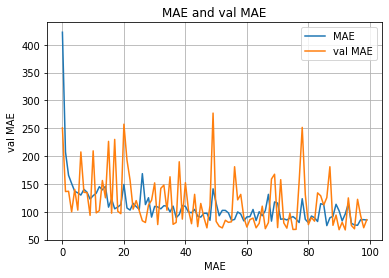

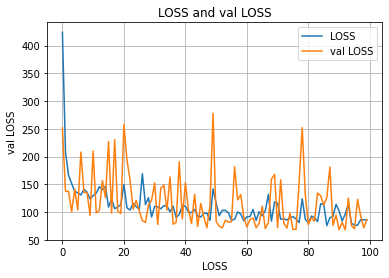

In [64]:
visualize_mae_loss(history_3)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/23 [==============================] - 0s 4ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
114/114 [==============================] - 0s 4ms/step


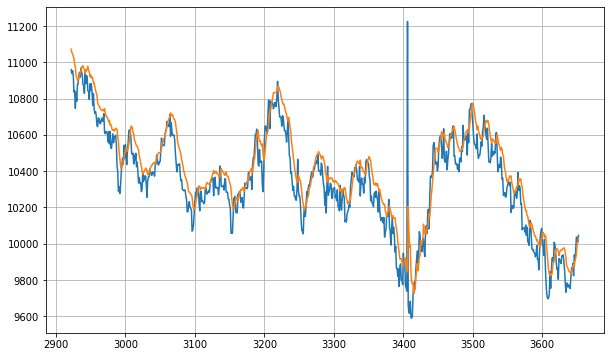

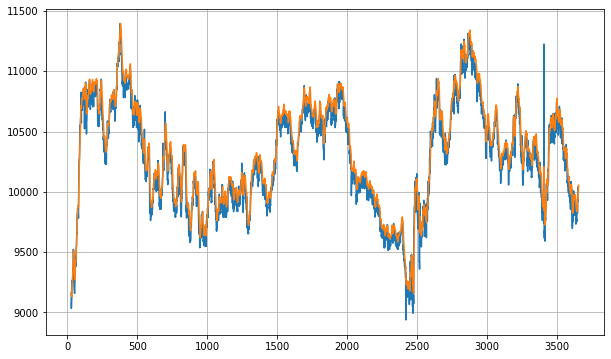

In [65]:
dnn_forecast_model_3 = evaluate_forecast(model_3, G.TIME, G.SERIES, time_valid, series_valid,
                                       G.SPLIT_TIME, -1, G.WINDOW_SIZE, G.BATCH_SIZE)

In [66]:
metrics_model_3 = compute_metrics(series_valid, dnn_forecast_model_3)
metrics_model_3

{'mae': 313.64282, 'mse': 155476.08, 'rmse': 374.36447, 'mape': 3.0512397}

In [67]:
print(f'2 last Actual Price = {series_valid[-2:]}, Predicted Price = {dnn_forecast_model_3[-2:]}')

2 last Actual Price = [[10009.07148]
 [10046.14142]], Predicted Price = [10013.87  10030.188]


## Future Predictions

Doing 1 week predictions

In [68]:
into_future = 7

future_forecast_model_1 = make_future_forecast(values=G.SERIES,
                                               model=model_1,
                                               into_future=into_future,
                                               window_size=G.WINDOW_SIZE)

future_forecast_model_2 = make_future_forecast(values=G.SERIES,
                                               model=model_2,
                                               into_future=into_future,
                                               window_size=G.WINDOW_SIZE)

future_forecast_model_3 = make_future_forecast(values=G.SERIES,
                                               model=model_3,
                                               into_future=into_future,
                                               window_size=G.WINDOW_SIZE)

1/1 [==============================] - 0s 47ms/step
Predicting on:
 [[ 9803.664039]
 [ 9917.814142]
 [ 9911.809067]
 [ 9900.171447]
 [ 9890.961206]
 [ 9933.931976]
 [ 9933.937566]
 [ 9938.559109]
 [ 9902.850032]
 [ 9855.033924]
 [ 9786.017147]
 [ 9732.244819]
 [ 9782.364879]
 [ 9782.358532]
 [ 9760.596588]
 [ 9772.227162]
 [ 9767.350095]
 [ 9753.294157]
 [ 9809.900358]
 [ 9866.521061]
 [ 9853.135344]
 [ 9890.402272]
 [ 9823.82598 ]
 [ 9937.283196]
 [ 9918.5046  ]
 [ 9962.285652]
 [10036.6389  ]
 [10035.14467 ]
 [10009.07148 ]
 [10046.14142 ]] -> Prediction: 9925.037109375

1/1 [==============================] - 0s 68ms/step
Predicting on:
 [ 9917.814142    9911.809067    9900.171447    9890.961206
  9933.931976    9933.937566    9938.559109    9902.850032
  9855.033924    9786.017147    9732.244819    9782.364879
  9782.358532    9760.596588    9772.227162    9767.350095
  9753.294157    9809.900358    9866.521061    9853.135344
  9890.402272    9823.82598     9937.283196    9918.5046


In [69]:
start_future = G.TIME[-1] + 1
future_time = np.arange(start_future, start_future + into_future)

# Insert last timestep/final price into next time steps and future forecasts so the plot connects
future_time = np.insert(future_time, 0, G.TIME[-1])
future_forecast_model_1 = np.insert(future_forecast_model_1, 0, G.SERIES[-1])
future_forecast_model_2 = np.insert(future_forecast_model_2, 0, G.SERIES[-1])
future_forecast_model_3 = np.insert(future_forecast_model_3, 0, G.SERIES[-1])

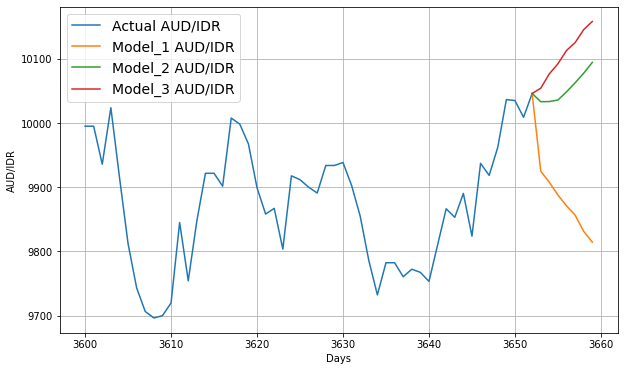

In [75]:
plt.figure(figsize=(10, 6))
plot_future_forecast(G.TIME, G.SERIES, start=3600, format="-", label="Actual AUD/IDR", xlabel="Days", ylabel="AUD/IDR")
plot_future_forecast(future_time, future_forecast_model_1, format="-", label="Model_1 AUD/IDR", xlabel="Days", ylabel="AUD/IDR")
plot_future_forecast(future_time, future_forecast_model_2, format="-", label="Model_2 AUD/IDR", xlabel="Days", ylabel="AUD/IDR")
plot_future_forecast(future_time, future_forecast_model_3, format="-", label="Model_3 AUD/IDR", xlabel="Days", ylabel="AUD/IDR")

## Compare model

In [71]:
model_results = pd.DataFrame({"model_5_layers": metrics_model_1,
                              "model_4_layers_regularized": metrics_model_2,
                              "model_5_layers_regularized": metrics_model_3}).T

model_results

,mae,mse,rmse,mape
model_5_layers,313.283569,154646.250000,375.329437,3.028345
model_4_layers_regularized,309.884888,152048.656250,371.041382,3.010686
model_5_layers_regularized,313.642822,155476.078125,374.364471,3.051240


## Ensemble modeling

In [76]:
ensemble_prediction = (dnn_forecast_model_1 + dnn_forecast_model_2 + dnn_forecast_model_3)/3

ensemble_metrics = compute_metrics(series_valid, ensemble_prediction)
display(metrics_model_1)
display(metrics_model_2)
display(metrics_model_3)
display(ensemble_metrics)

{'mae': 313.28357, 'mse': 154646.25, 'rmse': 375.32944, 'mape': 3.0283446}

{'mae': 309.8849, 'mse': 152048.66, 'rmse': 371.04138, 'mape': 3.0106857}

{'mae': 313.64282, 'mse': 155476.08, 'rmse': 374.36447, 'mape': 3.0512397}

{'mae': 308.72256, 'mse': 150763.81, 'rmse': 370.0433, 'mape': 2.9958136}

In [79]:
print(f'''2 last Actual Price = {series_valid[-2:]}, 
Model 1 Predicted Price = {dnn_forecast_model_1[-2:]}, 
Model 2 Predicted Price = {dnn_forecast_model_2[-2:]}, 
Model 3 Predicted Price = {dnn_forecast_model_3[-2:]}, 
Ensemble Predicted Price = {ensemble_prediction[-2:]}''')

2 last Actual Price = [[10009.07148]
 [10046.14142]], 
Model 1 Predicted Price = [9895.81  9915.309], 
Model 2 Predicted Price = [10001.584 10011.212], 
Model 3 Predicted Price = [10013.87  10030.188], 
Ensemble Predicted Price = [9970.422 9985.569]
